<a href="https://colab.research.google.com/github/mvcortez/Differentiation/blob/main/BSGC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numba import jit
from scipy.integrate import solve_ivp
from scipy.misc import imread
import matplotlib.image as image

In [ ]:
def ssa(init_m,init_d,g1,g2,k1,k2,kappa,T):
    MAX=2000000
    sub_m=np.zeros([T+1])
    sub_d=np.zeros([T+1])
    sub_m[0]=init_m
    sub_d[0]=init_d
    v=np.array([[0, 1],[0, 1],[0, -1],[1, 0],[-1,0]])   #reaction vectors growth,diff,death
    
    m=np.zeros(MAX)   #mother cell
    d=np.zeros(MAX)   #daughter cell
    t_x=np.zeros(MAX) #reaction time

    m[0]=init_m
    d[0]=init_d
    j=0     
    idx=0
    while t_x[j]<T:
        eta=(1+(m[j]/K1)**q)**(-1)
        gamma=(1+(d[j]/K2)**q)**(-1)
        a=np.array([g2*gamma*d[j], g1*gamma*(1-eta)*m[j], k2*kappa*d[j], g1*gamma*eta*m[j],k1*kappa*m[j]] )
        cumsum_a=np.cumsum(a)
        sum_a=np.sum(a)
        epsilon=np.random.uniform(0,1,2)
        if sum_a==0:
            [m[j+1],d[j+1]]=[m[j],d[j]]
            tau=1
        else:
            tau=(np.log(1./epsilon[1]))/sum_a
            l=np.min(np.where(epsilon[0]*sum_a<cumsum_a))
            [m[j+1],d[j+1]]=[m[j],d[j]]+v[l]
        t_x[j+1]=t_x[j]+tau
        if t_x[j+1]>idx+1:
            while idx<t_x[j+1]:
                idx+=1
                if idx<=T:
                    sub_m[idx]=m[j]
                    sub_d[idx]=d[j]
        j+=1
    return m[:j],d[:j],t_x[:j]#sub_m, sub_d 

def BSGC(t,z,K1,K2,k1,k2,g1,g2,q):
    eta=(1+(z[0]/K1)**q)**(-1)
    gamma=(1+(z[1]/K2)**q)**(-1)
    N1=g1*eta*gamma*z[0]-k1*z[0]
    N2=(g2*z[1]+g1*(1-eta)*z[0])*gamma-k2*z[1]
    return [N1, N2]

def trajectory(g1,g2,k1,k2,i,tag,col):
    m,d,t_x=ssa(init_m,init_d,g1,g2,k1,k2,kappa,T)
    sol = solve_ivp(lambda t, z: BSGC(t, z, K1,K2,k1,k2,g1,g2,q), [0, T], [init_m, init_d],dense_output=True)
    z = sol.sol(t)
    axes[i].plot(t_x,m,color='r',alpha=0.4,label='SSA Mother')
    axes[i].plot(t_x,d,color='g',alpha=0.4,label='SSA Daughter')
    axes[i].plot(t,z[0].T,'r',label='ODE Mother')
    axes[i].plot(t,z[1].T,'g',label='ODE Daughter')
    #plt.legend()
    axes[i].set_xlabel('time')
    axes[i].set_title(tag,color=col)
    axes[i].set_ylim([0,4000])
    axes[i].set_yticks([0,2000,4000])
    axes[i].set_xlim([0,T])
    axes[i].set_xticks([0,T/2,T])
    axes[i].spines['right'].set_color('none')
    axes[i].spines['top'].set_color('none')

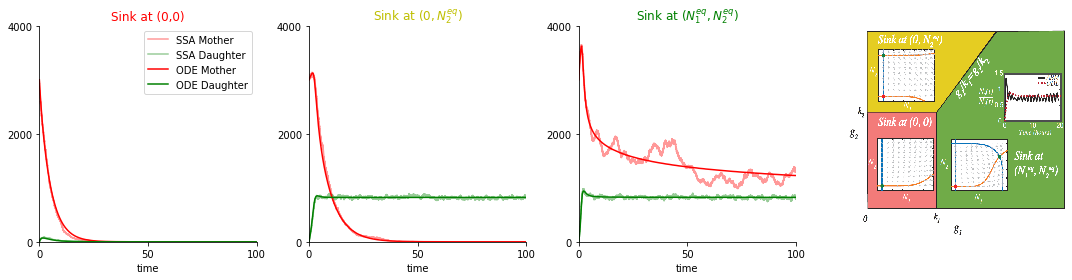

In [ ]:
#stochastic model parameters
init_m=3000
init_d=0
g1_init=g2_init=0.5    #### 
k1_init=k2_init=0.5    ####
kappa_init=1

#ODE model hyeprparameters
q=5
K1=5000
K2=1000

T=100

g1=[0.6,0.9,1.1]
g2=[0.6,1.1,1.1]
k1=[0.8,0.8,0.8]
k2=[0.8,0.8,0.8]
kappa=1
fig, axes = plt.subplots(1,4,figsize=(15,4))
plt.subplots_adjust(left=0.1, bottom=0.1)
t = np.linspace(0, T, 300)
tag=['Sink at (0,0)',r'Sink at $(0,N_2^{eq})$',r'Sink at $(N_1^{eq},N_2^{eq})$']
col=['r','y','g']
for i in range(3):
    trajectory(g1[i],g2[i],k1[i],k2[i],i,tag[i],col[i])
im = image.imread('bsgc_dynamics.png')
axes[0].legend()
axes[3].imshow(im,aspect='auto')
axes[3].axis('off')
plt.tight_layout()

Keep $\kappa$ at 1 for BSGC. The bifurcation diagram (last image) given above shows the possible behavior of the system at different points in the parameter space.